# Difficulty of Reading Level of
## of Academic and Popular and Psuedo scientific Language

In [1]:
LOAD_CACHED = False
!pwd

/home/jovyan/wcproject


In [2]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import purge
#flat_iter = [ (b,category) for category in SEARCHLIST for b in range(0,WEB) ]
#ltas = list(map(purge,iter(flat_iter)))
if LOAD_CACHED:
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)
else:
    import dask.bag as db
    from t_analysis_df import web_iter, map_wrapper
    QUERY_LIST = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
    list_per_links = list(map(web_iter,QUERY_LIST)) 
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []
    for i in remove_empty:
        unravel+=i
    #with open('unraveled_links.p','wb') as handle:
    #    pickle.dump(unravel,handle)
    print(type(unravel))
import pandas as pd


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_0.p'> location before crash
crashes in file type read
https://www.bing.com/search?format=rss&num=100&filter=0&first=&q=GMO
0
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_1.p'> location before crash
crashes in file type read
https://www.bing.com/search?format=rss&num=100&filter=0&first=&q=GMO
1
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_2.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=genetically+modified+organism&filters=ufn%3a%22genetically+modified+organism%22+sid%3a%22c3815553-adc9-51cc-87ca-38dd023db4bb%22+catguid%3a%22c3815553-adc9-51cc-87ca-38dd023db4bb_cfb02057%22+segment%3a%22generic.carousel%22+entitysegment%3a%22FieldOfStudy%22&FORM=SNAPST
2
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_3.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=genetically+modified+food&filters=ufn%3a%22genetically+modifi

GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_32.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=GMO&filters=ex1%3a%22ez1%22&num=100&filter=0&qpvt=GMO
32
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_33.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=GMO&filters=ex1%3a%22ez2%22&num=100&filter=0&qpvt=GMO
33
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_34.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=GMO&filters=ex1%3a%22ez3%22&num=100&filter=0&qpvt=GMO
34
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_35.p'> location before crash
35
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_36.p'> location before crash
36
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_37.p'> location before crash
37
GMO <_io.BufferedReader name='/home/jovyan/wcproject/GMO/bing_38.p'> location before crash
38
GMO <_io.Buf

Transgenic <_io.BufferedReader name='/home/jovyan/wcproject/Transgenic/google_1.p'> location before crash
crashes in file type read
http://www.dictionary.com/browse/transgenic
35
Transgenic <_io.BufferedReader name='/home/jovyan/wcproject/Transgenic/google_2.p'> location before crash
crashes in file type read
http://knowgenetics.org/transgenic-organisms/
36
Transgenic <_io.BufferedReader name='/home/jovyan/wcproject/Transgenic/google_3.p'> location before crash
crashes in file type read
https://www.merriam-webster.com/dictionary/transgenic
37
Transgenic <_io.BufferedReader name='/home/jovyan/wcproject/Transgenic/google_4.p'> location before crash
crashes in file type read
https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/transgenic
38
Transgenic <_io.BufferedReader name='/home/jovyan/wcproject/Transgenic/google_5.p'> location before crash
crashes in file type read
https://www.sciencedirect.com/topics/medicine-and-dentistry/transgene
39
Transgenic <_io.Buf

Vaccine <_io.BufferedReader name='/home/jovyan/wcproject/Vaccine/bing_24.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=mmr+vaccine&filters=ufn%3a%22mmr+vaccine%22+sid%3a%22f7cffde3-334a-e59e-bc42-cb5e5c7f3ad5%22+catguid%3a%22ae1169d9-46b8-fb31-bdf2-eba5b17b5ada_cfb02057%22+segment%3a%22generic.carousel%22&FORM=SNAPST
24
Vaccine <_io.BufferedReader name='/home/jovyan/wcproject/Vaccine/bing_25.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=dpt+vaccine&filters=ufn%3a%22dpt+vaccine%22+sid%3a%22523bf052-40bb-b07b-dd65-98a655c50445%22+catguid%3a%22ae1169d9-46b8-fb31-bdf2-eba5b17b5ada_cfb02057%22+segment%3a%22generic.carousel%22&FORM=SNAPST
25
Vaccine <_io.BufferedReader name='/home/jovyan/wcproject/Vaccine/bing_26.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=hepatitis+b+vaccine&filters=ufn%3a%22hepatitis+b+vaccine%22+sid%3a%229e6f8415-3ebc-cc65-ea3d-1e4e36bb0016%22+catguid%3a%22ae1169d

Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_8.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=neutron+werner+heisenberg&filters=ufn%3a%22neutron+werner+heisenberg%22+sid%3a%2214e5ac15-9918-4e72-ca26-7cb6aca358c5%22+catguid%3a%22439aaa80-d544-d9f6-3df8-8f8e968e8179_6e3e4389%22+segment%3a%22generic.carousel%22&FORM=SNAPST
8
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_9.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=neutron+enrico+fermi&filters=ufn%3a%22neutron+enrico+fermi%22+sid%3a%223d72d74f-c6b1-e633-a9e7-1f342df23d68%22+catguid%3a%22439aaa80-d544-d9f6-3df8-8f8e968e8179_6e3e4389%22+segment%3a%22generic.carousel%22&FORM=SNAPST
9
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_10.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=neutron+enrico+fermi&filters=ufn%3a%22neutron+enrico+fermi%22+sid%3a%223d72d74f-c6b1-e6

Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_33.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=neutron+industries&FORM=QSRE5
33
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_34.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=jimmy+neutron+movie&FORM=QSRE6
34
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_35.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=mass+of+neutron&FORM=QSRE7
35
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_36.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=charge+of+an+electron&FORM=QSRE8
36
Neutron <_io.BufferedReader name='/home/jovyan/wcproject/Neutron/bing_37.p'> location before crash
crashes in file type read
https://www.bing.com/search?num=100&filter=0&q=Neutron&first=7&FORM=PERE
37
Neutron <_io.BufferedReader name='/home/jovyan

Play Dough <_io.BufferedReader name='/home/jovyan/wcproject/Play Dough/bing_25.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=Play+Dough&num=100&filter=0&qpvt=Play+Dough
25
Play Dough <_io.BufferedReader name='/home/jovyan/wcproject/Play Dough/bing_26.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=Play+Dough&filters=ex1%3a%22ez1%22&num=100&filter=0&qpvt=Play+Dough
26
Play Dough <_io.BufferedReader name='/home/jovyan/wcproject/Play Dough/bing_27.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=Play+Dough&filters=ex1%3a%22ez2%22&num=100&filter=0&qpvt=Play+Dough
27
Play Dough <_io.BufferedReader name='/home/jovyan/wcproject/Play Dough/bing_28.p'> location before crash
crashes in file type read
https://www.bing.com/search?q=Play+Dough&filters=ex1%3a%22ez3%22&num=100&filter=0&qpvt=Play+Dough
28
Play Dough <_io.BufferedReader name='/home/jovyan/wcproject/Play Dough/bing_29.p'> location befo

In [3]:
QUERY_LIST = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
ENGINE_LIST = ['google_','gScholar_','bing_', 'duckduckgo_']


# Wrangle unwieldly dict of dicts and coerce into Pandas Data Frame
For a statistics and plotting friendly data base like type.


In [4]:
print(unravel)

crude_text = [ f for f in unravel ] 
url_text = [ f for f in unravel ] 
import pandas as pd
ct = pd.DataFrame(crude_text,columns=unravel[0].keys())
#ctu = pd.DataFrame(url_text,columns=ct[0].keys())
import utils
for i, txt in enumerate(ct.index):   
    print(ct.iloc[i]['file_path'])
    #fileHandle = open(str(ct.iloc[i]['file_path']), 'rb');    
    #if utils.black_string(file_contents[1]) == True:
    #    ct.drop.iloc[i]
        #print(ct.iloc[i]['raw_text'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
list(ct.columns.values)
df2 = ct.loc[ct['keyword'] == 'Play Dough', ['fkg']]
ct = ct.drop(ct[ct.fkg > 100].index)
df2 = ct.loc[ct['keyword'] == 'Play Dough', ['fkg']]
#ctu = pd.DataFrame(url_text,columns=ct['urlDat'][0].keys())



#ctu
#print(url_text)

49 49
0 0
48 49
49 49
49 49
49

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


 49


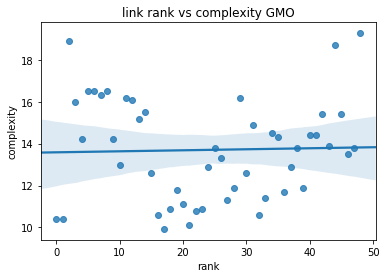

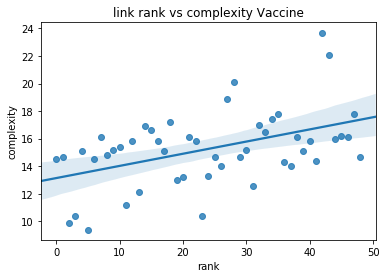

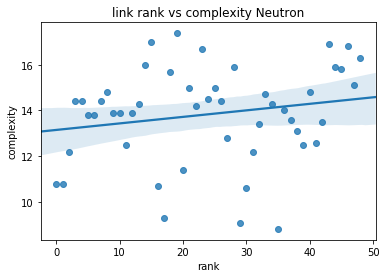

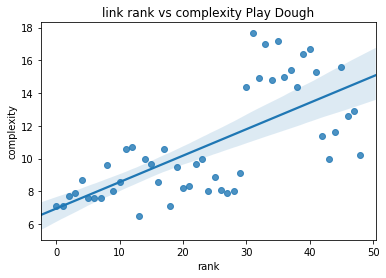

In [6]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    

    #complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    complexity = ct.loc[ct['keyword'] == search_query, ['fkg']]
    complexity = complexity['fkg'].values

    
    rank = [ f['link_rank'] for f in unravel if f['keyword'] == search_query ]#and f['urlDat']['se'] == v ]
    print(len(complexity),len(rank))
    if len(complexity)>0 and len(rank)>0:
        if len(complexity)==len(rank):
            plt.figure()


            df = pd.DataFrame({'complexity': complexity,'rank': rank})
            plt.title(str('link rank vs complexity ')+str(search_query))
            ax = sns.regplot(x="rank",y="complexity", data=df)

#))
legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()       

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


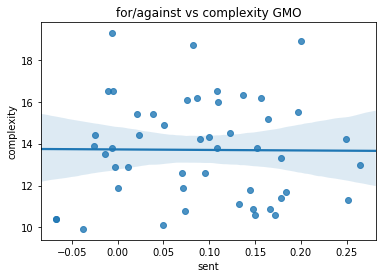

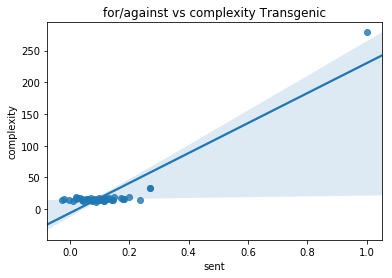

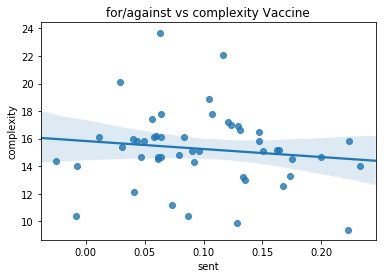

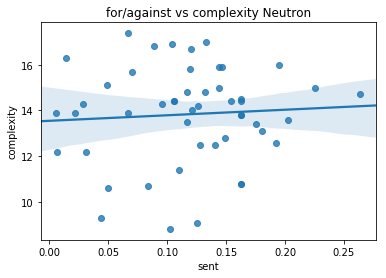

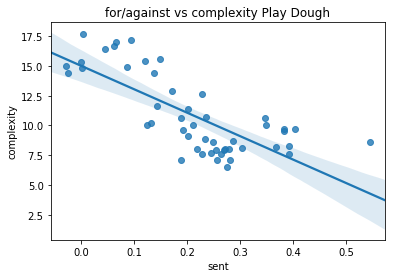

In [7]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    
    complexity = [ f['fkg'] for f in unravel if f['keyword'] == search_query ]
    #complexity = ctu.loc[ctu['keyword'] == search_query, ['fkg']]
    #complexity = complexity['fkg'].values
    sent = [ f['sp'] for f in unravel if f['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        if len(complexity)==len(sent):


            df = pd.DataFrame({'complexity': complexity,'sent': sent})
            plt.figure()
            plt.title(str('for/against vs complexity ')+str(search_query))
            ax = sns.regplot(x="sent",y="complexity", data=df)
legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


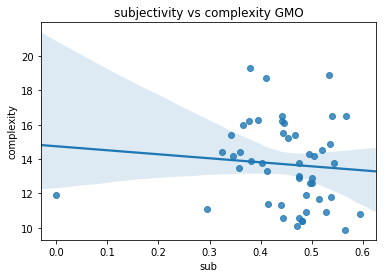

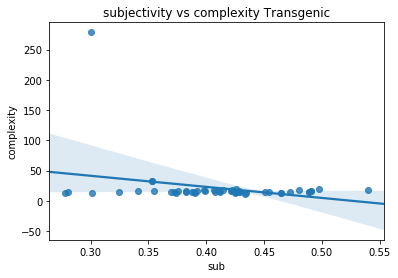

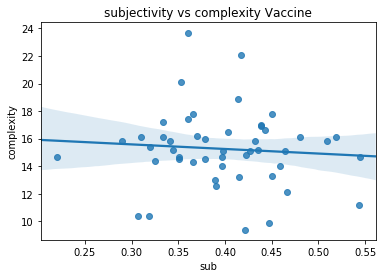

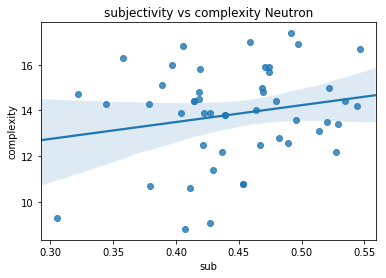

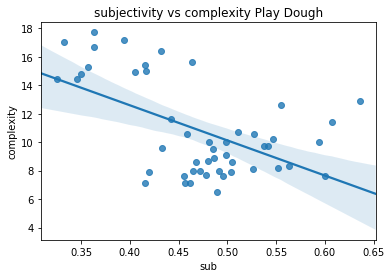

In [8]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    
    complexity = [ f['fkg'] for f in unravel if f['keyword'] == search_query ]
    sub = [ f['ss'] for f in unravel if f['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        df = pd.DataFrame({'complexity': complexity,'sub': sub})
        plt.figure()
        plt.title(str('subjectivity vs complexity ')+str(search_query))
        ax = sns.regplot(x="sub",y="complexity", data=df)


legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

In [21]:



gsc_text = list(filter(lambda x: x['se'] == 'gScholar_', crude_text))
bibg_text = list(filter(lambda x: x['se'] == 'bing_', crude_text))

for q in ENGINE_LIST:
    check = list(filter(lambda x: x['se'] == q, crude_text))

for q in QUERY_LIST:
    check = list(filter(lambda x: x['keyword'] == q, crude_text))
    
# total number of words
ents = ct['eofh']


droplist = []
droplist.append(ct.loc[10])



In [22]:
#urls = ct[ct.columns=='urlDat'] 
urls = ct.values
#print(urls[0].keys())
#print(dir(urls))
#urls.keys()

#url = pd.DataFrame(urls,columns= urls[0].keys())#columns=urls.keys())


#yahoos = urls.values
#yahoos



#googles = ct[ct['urlDat'].keys()['se'] ] 
#print
#df2 = ct.loc[ct['urlDat'].keys().values]
#print(df2)
#df2 = ctu.loc[ctu['keyword'] == 'Play Dough', ['fkg']]
#ctu = pd.DataFrame(url_text,columns=ct['urlDat'][0].keys())



    #complexity = ctu.loc[ctu['keyword'] == search_query, ['fkg']]
    #complexity = complexity['fkg'].values
    

In [23]:
# Uncomment these lines to read in some raw text
# ct.loc[49]['raw_text']

In [24]:
# Uncomment these lines to read in some raw text
# ct.loc[10]['raw_text']

In [25]:
# Uncomment to see everything pretty printed
# ctu

# Unigram model expected value
Entropies of texts

In [26]:
#print(unravel)
freqs = [  u['frequencies'] for u in unravel ]
freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
wt = len(giantmodel)


7.25612419505
0.359998957802


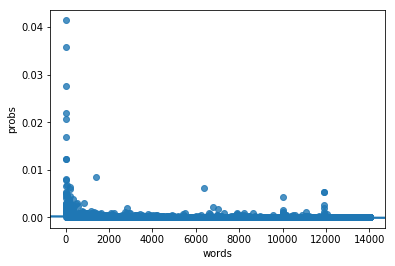

In [27]:

gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent

#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))

wns = [ x for x in range(0,len(ents)) ]
probs = [i[0] for i in probs]
import pandas as pd
d = {'words': wns, 'probs': probs}
df = pd.DataFrame(data=d)
ax = sns.regplot(x='words', y='probs', data=df)
plt.show()


In [28]:
stat_items = [ f for f in unravel ] 

unravel[0];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

features = [ list(c.values())[0:-1] for c in crude_text ]
feature_labels = [ list(c.keys())[0:-1] for c in crude_text ]

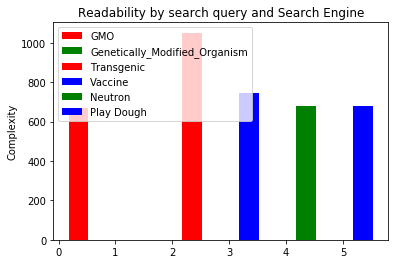

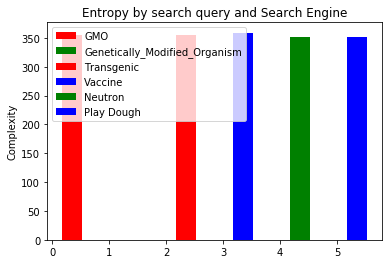

In [29]:
# 3.       GMO/transgenics vs. text complexity
y = []
e = []
for outer,sq in enumerate(QUERY_LIST):    

    comp = sum([ f['fkg'] for f in unravel if f['keyword'] ==sq])
    entropy = sum([ f['eofh'] for f in unravel if f['keyword'] ==sq  ])
    y.append(comp)
    e.append(entropy)
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(QUERY_LIST)]
offset = [(i+width) for i,v in enumerate(ind)]
rects1 = ax.bar(offset[0], y[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], y[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], y[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], y[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], y[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], y[4], width, color='b')#, yerr=women_std)




# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')

ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)
plt.show()
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
rects1 = ax.bar(offset[0], e[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], e[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], e[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], e[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], e[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], e[4], width, color='b')#, yerr=women_std)


ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)


plt.show()

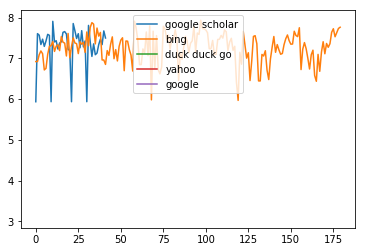

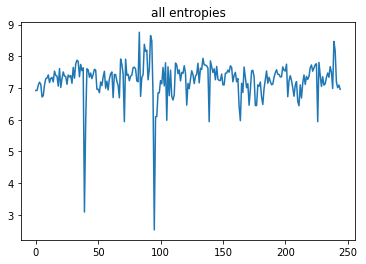

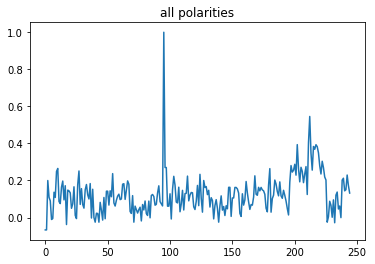

245
(245,)


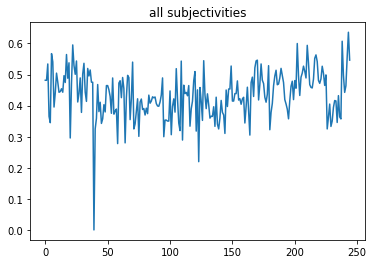

In [30]:

gsc_text = list(filter(lambda x: x['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['se'] == 'bing_', crude_text))
gword_names = [ c['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'duckduckgo_'] 
yahoo_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
fig, ax = plt.subplots()

plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies,label='google scholar')
plt.plot([ x for x in range(0,len(bing_entropies)) ],bing_entropies,label='bing')
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies,label='duck duck go')
plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies,label='yahoo')
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies,label='google')
legend = ax.legend(loc='upper center')

plt.show()

all_entropies = [e['eofh'] for e in crude_text ] 
all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


Is entropy a good predictor of all other variables?


In [31]:

'''      
Xs = []
y = []    
for i in features:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)
'''

print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



NameError: name 'Xs' is not defined

In [ ]:

      
Xs = []
y = []    
for i in features:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)



print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



In [ ]:
features[0]

In [ ]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#!pip install ipyvolume
from mpl_toolkits.mplot3d import Axes3D
#import ipyvolume.pylab as p3

pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
#report_mean_var(data_rotated)

def variance_explained(df,pca):
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    for i in range(n_components):
        print("PC %d explains %.3g%% of the variance" % (i+1,100*pca.explained_variance_ratio_[i]))

variance_explained(pd.DataFrame(data_rotated),pca)

reduced_dims = pca.components_#* data 
def annotate_scatter(ax,df_transformed,df):
    for i, txt in enumerate(df.index):
        x_loc = df_transformed['PC 1'].iloc[i]
        y_loc = df_transformed['PC 2'].iloc[i]
        ax.annotate(txt, (x_loc,y_loc), fontsize=9)
    #for i, text in enumerate(df.index):
    #    ax.text(df['PC 1'].iloc[i],df['PC 2'].iloc[i], text)
        
def plot_transformed_data(pca,df_transformed,df,figsize=None):
    plt.clf()
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    pca_df = pd.DataFrame(pca.transform(df.values),
                      index=df.index,
                      columns=['PC %d' % (i+1) for i in range(n_components)])
    ax = pca_df.plot.scatter('PC 1','PC 2',figsize=figsize)
    #ax = mds_df.plot.scatter(x='PC 1',y='PC 2',figsize=(12,12))
    #annotate_scatter(ax,mds_df)
    annotate_scatter(ax,pca_df,df_transformed)
    plt.show()
    

plot_transformed_data(pca,pd.DataFrame(data),pd.DataFrame(data_rotated))
        
def plot3d(df):
    plt.clf()
    data = df.values
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data[:,0:3].T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    ax.set_xlabel(df.columns[0],labelpad=10)
    ax.set_ylabel(df.columns[1],labelpad=10)
    ax.set_zlabel(df.columns[2],labelpad=10)
    ax.dist = 12
    plt.tight_layout()    
    plt.show()
plot3d(pd.DataFrame(data_rotated))   



In [ ]:
print(reduced_dims[0])
print(reduced_dims[1])
print(data[0])

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=4)
#km.labels_
clustered = km.fit(features)


fignum = 1

plt.clf()
plt.title('K means auto clustering')
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(features[:, 3], features[:, 0], features[:, 2], edgecolor='k')

#ax.w_xaxis.set_ticklabels(clustered.labels_)
#ax.w_yaxis.set_ticklabels(clustered.labels_)
#ax.w_zaxis.set_ticklabels(clustered.labels_)
ax.set_xlabel('what is this dim?')
ax.set_ylabel('what is this dim?')
ax.set_zlabel('what is this dim?')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1
plt.show()


In [ ]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=14):
    plt.figure(figsize=(17,7))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');
    plt.show()    
#my_dendrogram(features,1.2,no_labels=True)        

In [ ]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 